In [77]:
import numpy as np
import pandas as pd
import copy
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
def load_datasets(filename, column_list, target_column):
    '''
    Читає вхідний файл
    
    Параметри:
    filename - шлях до вхідного файлу з даними
    column_list - список назв колонок-характеристик
    target_column - назва колонки з цільовою величиною
    
    Результат:
    X - набір характеристик
    y - набір передбачуваних величин
    '''
    
    df = pd.read_csv(filename, delimiter=',')
    X, y = df[column_list].values, df[target_column].values.reshape(-1, 1)
    return X, y

In [79]:
def split_datasets(X, y, test_size = 0.2):
    '''
    Розбиває дані на 2 датасети: тренувальний та тестувальний.
    
    Параметри:
    X - набір характеристик
    y - набір передбачуваних величин
    test_size - розмір тестового датасету
    
    Результат:
    X_train - набір тренувальних прикладів
    X_test - набір тестових прикладів
    y_train - вектор величин, що передбачаємо для тренувального датасету
    y_test - вектор величин, що передбачаємо для тестового датасету
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [80]:
def plot_data(X_train, X_test, y_train, y_test):
    '''
    Функція для відображення розподілу тренувальних та тестових даних (для однієї змінної)
    '''
    plt.scatter(X_train, y_train, marker='^', c='green')
    plt.scatter(X_test, y_test, marker='o', c='red')
    plt.show()

In [81]:
def normalize(X):
    '''
    Нормалізує датасет з характеристиками
    
    Параметри:
    X - набір характеристик
    
    Результат:
    X_new - набір нормалізованих характеристик, (X-mean)/std
    mean - вектор середніх значень характеристик
    std - вектор стандартних девіацій характеристик
    '''
    ##################
    # Заповнити змінні
    ##################
    mean = X.mean()
    std = X.std()
    X_new = (X - mean) / std
    return X_new, mean, std

In [82]:
def prepare_X(X):
    '''
    Формує датасет з рисами, де першою колонкою буде колонка з одиницями.
    
    Параметри:
    X - вхідний датасет з прикладами, по одному в рядок. Кожна риса - відповідна колонка.
    
    Результат:
    X_new - датасет, який складається з колонки одиниць, а решта колонок з X    
    '''
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [83]:
def hypothesis(X, theta):
    '''
    Обчислює значення передбачуваної величини для вхідної матриці X та вектора параметрів thetha.
    
    Параметри:
    X - матриця з рисами. Перша колонка - одиниці. Друга - дані риси.
    thetha - вектор параметрів: [thetha0, thetha1]
    
    Результат:
    Матриця значень шуканої величини для прикладів з X
    '''
    ######################
    # Один рядок коду
    ######################
    h_thetha = np.dot(X, theta[1]) + theta[0]
    return h_thetha

In [84]:
def cost_function(X, y, theta):
    '''
    Функція для обчислення штрафної функції J.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thethe - вектор параметрів регресії
    
    Результат:
    Дійсне число - значення штрафної функції для набору прикладів X та параметрів thetha
    '''
    m = X.shape[0]
    if m == 0:
        return None
    ######################
    # 1-2 рядки коду
    ######################
    J = 1 / (2 * m) * np.sum(np.power(hypothesis(X, theta) - y, 2))
    return J

In [85]:
def derivative(X, y, theta):
    m = X.shape[0]
    '''
    Функція для обчислення похідних штрафної функції J по thetha.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор параметрів регресії
    
    Результат:
    Вектор похідних d_thetha
    '''
    ######################
    # 1 рядок коду
    ######################
    d_thetha = np.array([(1 / m * np.sum(hypothesis(X, theta) - y)), (1 / m * np.sum(np.multiply(hypothesis(X, theta) - y, X)))])
    return d_thetha

In [86]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):
    '''
    Функція, що реалізує градієнтний спуск для метода лінійної регресії.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор початкових параметрів регресії
    alpha - швидкість навчання
    num_iters - кількість ітерацій
    print_J - виведення штрафної функції на екран після кожної ітерації
    
    Результат:
    theta - оптимальні значення параметрів регресії
    J_history - масив історичних значень штрафної функції після кожної ітерації
    
    
    1) J_i (theta_0, theta_1)
    2)  theta_0 = theta_0 - alpha*dtheta_0
        theta_1 = theta_1 - alpha*dtheta_1
        |J_i-J_{i-1}| < eps || num_iters>10000000000 -> break
    3) goto 1
    '''
    m = X.shape[0]
    theta_des = copy.deepcopy(theta)
    J_history = []
    for i in range(num_iters):
        J = cost_function(X, y, theta_des)
        d_thetha = derivative(X, y, theta_des)
        theta_des[0] -= alpha * d_thetha[0]
        theta_des[1] -= alpha * d_thetha[1]
        if print_J == True:
            print(J)
        J_history.append(J)
    return theta_des, J_history

In [87]:
def plot_J(X, y):
    '''
    Функція для виведення графіків штрафної функції для різних значень параметрів на вхідних даних
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    '''
    theta_0 = np.linspace(-20, 20, 100)
    theta_1 = np.linspace(-5, 10, 100)
    
    J_vals = np.zeros((len(theta_0), len(theta_1)))
    for i, t0 in enumerate(theta_0):
        for j, t1 in enumerate(theta_1):
            theta = np.array([t0, t1])
            J_vals[i, j] = cost_function(X, y, theta)
    
    J_vals = J_vals.T
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(theta_0, theta_1, J_vals, color='b')
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Surface plot of the cost function')
    plt.show()
    plt.contour(theta_0, theta_1, J_vals, np.logspace(-2, 3, 20))
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Contour plot of the cost function')
    plt.show()

## Основний код програми

Отримання датасетів та видрук їх параметрів.

In [88]:
X, y = load_datasets('burrito.csv', ["A"], "B")
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(97, 1), y=(97, 1)


In [89]:
y

array([[17.592  ],
       [ 9.1302 ],
       [13.662  ],
       [11.854  ],
       [ 6.8233 ],
       [11.886  ],
       [ 4.3483 ],
       [12.     ],
       [ 6.5987 ],
       [ 3.8166 ],
       [ 3.2522 ],
       [15.505  ],
       [ 3.1551 ],
       [ 7.2258 ],
       [ 0.71618],
       [ 3.5129 ],
       [ 5.3048 ],
       [ 0.56077],
       [ 3.6518 ],
       [ 5.3893 ],
       [ 3.1386 ],
       [21.767  ],
       [ 4.263  ],
       [ 5.1875 ],
       [ 3.0825 ],
       [22.638  ],
       [13.501  ],
       [ 7.0467 ],
       [14.692  ],
       [24.147  ],
       [-1.22   ],
       [ 5.9966 ],
       [12.134  ],
       [ 1.8495 ],
       [ 6.5426 ],
       [ 4.5623 ],
       [ 4.1164 ],
       [ 3.3928 ],
       [10.117  ],
       [ 5.4974 ],
       [ 0.55657],
       [ 3.9115 ],
       [ 5.3854 ],
       [ 2.4406 ],
       [ 6.7318 ],
       [ 1.0463 ],
       [ 5.1337 ],
       [ 1.844  ],
       [ 8.0043 ],
       [ 1.0179 ],
       [ 6.7504 ],
       [ 1.8396 ],
       [ 4.2

Розбиття датасету на частини:

In [90]:
test_size = 0.2 #0.0
X_train, X_test, y_train, y_test = split_datasets(X, y, test_size)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(77, 1), y=(77, 1)
Test set: X=(20, 1), y=(20, 1)


Відображення тренувальних і тестових даних на графіку (для 1 змінної)

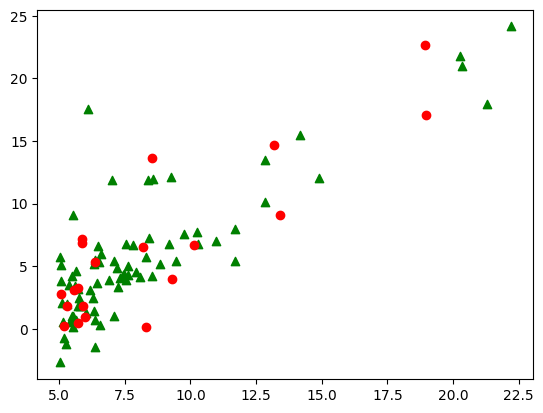

In [91]:
plot_data(X_train, X_test, y_train, y_test)

Підготовка тренувальних даних (додавання 0-колонки з одиницями). Ініціалізація параметрів регресії (0, 0): 

In [92]:
X_train_norm, mean_train, std_train = normalize(X_train)
X = prepare_X(X_train_norm)
theta = np.array([0, 0], dtype=float)

Для спрощення записів аліас для вектора передбачуваних значень

In [93]:
y = y_train[:]

У випадку використання ВСІХ даних для тренування (test_size=0.0), штрафна функція має повернути величину близьку до 32.072.

In [94]:
# #### Added for checking value of cost function
# X, y = load_datasets('burrito.csv', ["A"], "B")
# print('Dataset: X={}, y={}'.format(X.shape, y.shape))
# print('X: {}'.format(X.shape))
# print('y: {}'.format(y.shape))
# print(cost_function(X, y, theta))

In [95]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, y, theta))

X: (77, 2)
y: (77, 1)
60.63103396139351


Налаштування гіперпараметрів регресії: швидкості навчання та кількості ітерацій.

In [96]:
alpha = 0.01
num_iters = 1500

Запуск градієнтного спуску та видрук знайдених оптимальних значень на екран. У випадку використання всіх даних для тренування, результати будуть близькі до Theta 0: 5.84; Theta 1: 4.59

In [97]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1]))

Theta 0: 4.221129710162745; Theta 1: 2.939004553677397


Відображення штрафної функції як функції від thetha0, thetha1.

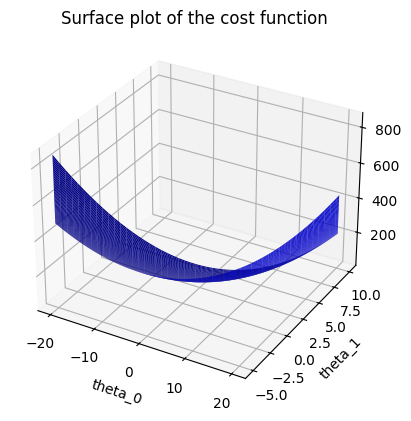

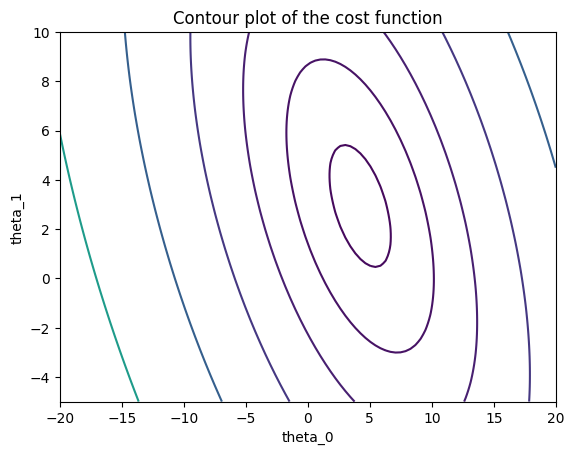

In [98]:
plot_J(X, y)

Відображення знайденої апроксимації разом із тренувальними даними.

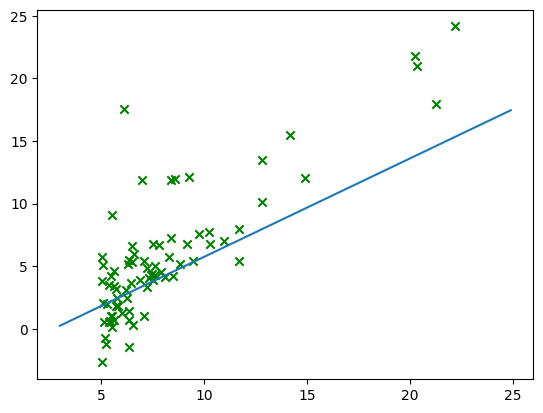

In [99]:
x = np.arange(3, 25, 0.1)
h = new_theta[0] + new_theta[1]*(x-mean_train)/std_train

plt.plot(x, h)
plt.scatter(X_train, y_train, marker='x', c='green')

plt.show()

Оцінка похибки апроксимації на тестових даних (test_size має бути більше 0.0 та менше 1.0).

In [100]:
####################
# Нормалізувати тестовий датасет, використовуючи mean, std з тренувального
####################
X_test_proc, _, _ = normalize(X_test)
X_test_proc = (X_test_proc - mean_train) / std_train
X_test_proc = prepare_X(X_test_proc)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100
print(y_test_pred.shape, y_test.shape, X_test.shape, rel_diff.shape)

(20, 2) (20, 1) (20, 1) (20, 2)


In [101]:
y_test_pred_reshaped0 = y_test_pred[:, 0].reshape(-1)
y_test_pred_reshaped1 = y_test_pred[:, 1].reshape(-1)
y_test_reshaped = y_test.reshape(-1)
X_test_reshaped = X_test.reshape(-1)
rel_diff0_reshaped = rel_diff[:, 0].reshape(-1)
rel_diff1_reshaped = rel_diff[:, 1].reshape(-1)
print(y_test_pred.shape, y_test.shape, X_test.shape, rel_diff.shape)
res = pd.DataFrame({'X' : X_test_reshaped, 'y_actual' : y_test_reshaped, 'y_pred0' : y_test_pred_reshaped0, 'y_pred1' : y_test_pred_reshaped1, 'real_diff0': rel_diff0_reshaped, 'real_diff1': rel_diff1_reshaped})
print(res)
print(cost_function(X_test_proc, y_test.reshape(-1, 1), new_theta))

(20, 2) (20, 1) (20, 1) (20, 2)
          X  y_actual   y_pred0   y_pred1   real_diff0   real_diff1
0   10.1360   6.67990  7.160134 -1.815367     7.189243   127.176556
1    5.3077   1.83960  7.160134 -2.714381   289.222345   247.552774
2    8.5186  13.66200  7.160134 -2.116521    47.590878   115.492033
3    5.7292   0.47953  7.160134 -2.635899  1393.156688   649.683830
4   18.9590  17.05400  7.160134 -0.172552    58.014928   101.011800
5    5.1884   0.20421  7.160134 -2.736594  3406.260352  1440.088195
6   13.1760  14.69200  7.160134 -1.249328    51.265081   108.503461
7    9.3102   3.96240  7.160134 -1.969128    80.701955   149.695339
8    5.8707   7.20290  7.160134 -2.609552     0.593729   136.229186
9   13.3940   9.05510  7.160134 -1.208738    20.927055   113.348694
10   8.2934   0.14454  7.160134 -2.158453  4853.738940  1593.325730
11   6.3654   5.30480  7.160134 -2.517440    34.974632   147.455898
12   5.0594   2.82140  7.160134 -2.760613   153.779481   197.845520
13   5.5649   3.